In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.metrics import accuracy_score
import statistics
import graphviz as gv
import random

In [2]:
#/content/sample_data/US Voting Dataset.txt
data = open('/content/sample_data/US Voting Dataset.txt')
y =[]
x = []
line = data.readline()
while(line):
  tempLine = line.split(",")
  y.append(tempLine[0])
  x.append(tempLine[1:])
  x[-1][-1] = x[-1][-1][0]   #to remove the \n at the end read from the file
  line = data.readline()

print(len(y))
print(len(x))
print(len(x[0]))
print(x[0])
print(x)
print(y)
print(y[0])

435
435
16
['n', 'y', 'n', 'y', 'y', 'y', 'n', 'n', 'n', 'y', '?', 'y', 'y', 'y', 'n', 'y']
[['n', 'y', 'n', 'y', 'y', 'y', 'n', 'n', 'n', 'y', '?', 'y', 'y', 'y', 'n', 'y'], ['n', 'y', 'n', 'y', 'y', 'y', 'n', 'n', 'n', 'n', 'n', 'y', 'y', 'y', 'n', '?'], ['?', 'y', 'y', '?', 'y', 'y', 'n', 'n', 'n', 'n', 'y', 'n', 'y', 'y', 'n', 'n'], ['n', 'y', 'y', 'n', '?', 'y', 'n', 'n', 'n', 'n', 'y', 'n', 'y', 'n', 'n', 'y'], ['y', 'y', 'y', 'n', 'y', 'y', 'n', 'n', 'n', 'n', 'y', '?', 'y', 'y', 'y', 'y'], ['n', 'y', 'y', 'n', 'y', 'y', 'n', 'n', 'n', 'n', 'n', 'n', 'y', 'y', 'y', 'y'], ['n', 'y', 'n', 'y', 'y', 'y', 'n', 'n', 'n', 'n', 'n', 'n', '?', 'y', 'y', 'y'], ['n', 'y', 'n', 'y', 'y', 'y', 'n', 'n', 'n', 'n', 'n', 'n', 'y', 'y', '?', 'y'], ['n', 'y', 'n', 'y', 'y', 'y', 'n', 'n', 'n', 'n', 'n', 'y', 'y', 'y', 'n', 'y'], ['y', 'y', 'y', 'n', 'n', 'n', 'y', 'y', 'y', 'n', 'n', 'n', 'n', 'n', '?', '?'], ['n', 'y', 'n', 'y', 'y', 'n', 'n', 'n', 'n', 'n', '?', '?', 'y', 'y', 'n', 'n'], ['n',

In [3]:
#republican = 0 , democrat = 1
for i in range(len(y)):
  if y[i] == 'republican':
    y[i] = 0 
  elif y[i] == 'democrat':
    y[i] = 1
  else:
    print("Garbage")

print(y)

[0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 

In [4]:
#y = 1 , n = 0
for i in range(len(x)):
  for j in range(len(x[i])):
    if(x[i][j] == 'y'):
      x[i][j] = 1
    elif(x[i][j] == 'n'):
      x[i][j] = 0
print(x)

[[0, 1, 0, 1, 1, 1, 0, 0, 0, 1, '?', 1, 1, 1, 0, 1], [0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, '?'], ['?', 1, 1, '?', 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0], [0, 1, 1, 0, '?', 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1], [1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, '?', 1, 1, 1, 1], [0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1], [0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, '?', 1, 1, 1], [0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, '?', 1], [0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1], [1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, '?', '?'], [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, '?', '?', 1, 1, 0, 0], [0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, '?', 1, 1, '?', '?'], [0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, '?', '?'], [1, 1, 1, 0, 0, 1, 1, 1, '?', 1, 1, '?', 0, 0, 1, '?'], [0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, '?', '?', 0, '?'], [0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, '?', 0, '?'], [1, 0, 1, 0, 0, 1, 0, 1, '?', 1, 1, 1, '?', 0, 0, 1], [1, '?', 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1], [0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, '?', 1, 1

In [5]:
#The data set contained many missing values, i.e., votes in which a member of
#congress failed to participate. To solve those issue insert—for each absent
#vote—the voting decision of the majority

In [6]:
#? = mode of x[i]
modes = []
for i in range(len(x[0])):
  temp = []
  for j in range(len(x)):
    if(x[j][i] != '?'):
      temp.append(x[j][i])
  modes.append(statistics.mode(temp))

print(modes)

for i in range(len(x)):
  for j in range(len(x[i])):
    if(x[i][j] == '?'):
      x[i][j] = modes[j]

print(x)

[0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1]
[[0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1], [0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1], [0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0], [0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1], [1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1], [0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1], [0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1], [0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1], [0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1], [1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1], [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0], [0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1], [0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1], [1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1], [0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1], [0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1], [1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1], [1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1], [0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0], 

In [7]:
#In Scikit-learn, the random state hyperparameter is denoted by random_state . It usually takes one of the following values.

#None: This is the default value. This allows the function to use the global random state instance from np.random . 
#If you call the same function multiple times with random_state=None, that function will produce different results across different executions.

#int: We can use an integer for random_state . Yes! We can use any integer including 0, but not negative ones, 
#only positive integers. The most popular integers are 0 and 42. When we use an integer for random_state, 
#the function will produce the same results across different executions. The results are only changed if we change the integer value.

In [8]:
#Measure the impact of training set size on the accuracy and the size of the learned
#tree. Consider training set sizes in the range (50-80%). Because of the high variance
#due to random splits repeat the experiment with five different random seeds for each
#training set size then report the mean, maximum and minimum accuracies at each
#training set size. Also measure the mean, max and min tree size.


In [9]:
#How do you determine the size of a decision tree?
#The size of a decision tree is the number of nodes in the tree. Note that if each node of 
#the decision tree makes a binary decision, the size can be as large as 2d+1−1, where d is the depth

In [10]:
#The export_graphviz exporter also supports a variety of aesthetic options, including coloring nodes
#by their class (or value for regression) and using explicit variable and class names if desired. Jupyter
#notebooks also render these plots inline automatically

In [24]:
trainSize = 0.5
SizeResult = []
ScoreResult = []

while(trainSize <= 0.8):

  tempSize = []
  tempAccuracy = []

  for i in range(5):

    x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = trainSize,shuffle=True,random_state = None) 
    
    # create a classifier object
    decision_tree = tree.DecisionTreeClassifier(criterion='entropy') 
    # fit the regressor with X and Y data
    decision_tree = decision_tree.fit(x_train, y_train)
    size = decision_tree.tree_.node_count
    tempSize.append(size)
    y_pred = decision_tree.predict(x_test)
    score = accuracy_score(y_pred,y_test)*100
    tempAccuracy.append(score)
    dot_data = tree.export_graphviz(decision_tree,out_file=None,feature_names=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],class_names=["Republican","Democrat"], filled=True, rounded=True, special_characters=True)
    graph = gv.Source(dot_data)
    pathToSaveFiles = "/content/"
    name = str(trainSize)+'_'+str(i+1)
    finalPath = pathToSaveFiles + name
    filename = graph.render(filename= finalPath) #save a pdf of the final tree picture and also a file of the dot_data information source

  SizeResult.append(tempSize)
  ScoreResult.append(tempAccuracy)
  trainSize = round(trainSize + 0.1,1)

print(SizeResult)
print(ScoreResult)

[[39, 33, 35, 19, 31], [47, 21, 37, 43, 47], [61, 47, 33, 55, 55], [47, 63, 51, 51, 55]]
[[96.3302752293578, 94.03669724770643, 93.11926605504587, 94.4954128440367, 91.74311926605505], [90.80459770114942, 93.67816091954023, 93.10344827586206, 93.67816091954023, 94.25287356321839], [96.18320610687023, 94.65648854961832, 92.36641221374046, 96.18320610687023, 92.36641221374046], [93.10344827586206, 97.70114942528735, 97.70114942528735, 95.40229885057471, 96.55172413793103]]


In [25]:
trainSize = 0.5

for i in range(4):
    print("At Training Size : " + str(round(trainSize,1)))
    print("_______________________________________________________________________________________")    
    print("The minimum accuracy score is : "+ str(min(ScoreResult[i])))
    print("The maximum accuracy score is : "+ str(max(ScoreResult[i])))
    print("The mean accuracy score is : "+ str(np.mean(ScoreResult[i])))
    print("The minimum tree size is : "+ str(min(SizeResult[i])))
    print("The maximum tree size is : "+ str(max(SizeResult[i])))
    print("The mean tree size is : "+ str(int(np.mean(SizeResult[i]))))
    print("_______________________________________________________________________________________")
    trainSize = trainSize + 0.1


At Training Size : 0.5
_______________________________________________________________________________________
The minimum accuracy score is : 91.74311926605505
The maximum accuracy score is : 96.3302752293578
The mean accuracy score is : 93.94495412844036
The minimum tree size is : 19
The maximum tree size is : 39
The mean tree size is : 31
_______________________________________________________________________________________
At Training Size : 0.6
_______________________________________________________________________________________
The minimum accuracy score is : 90.80459770114942
The maximum accuracy score is : 94.25287356321839
The mean accuracy score is : 93.10344827586206
The minimum tree size is : 21
The maximum tree size is : 47
The mean tree size is : 39
_______________________________________________________________________________________
At Training Size : 0.7
_______________________________________________________________________________________
The minimum accuracy sco

In [14]:
#Turn in two plots showing how accuracy varies with training set size and how the
#number of nodes in the final tree varies with training set size.


[93.94, 93.1, 94.35, 96.09]


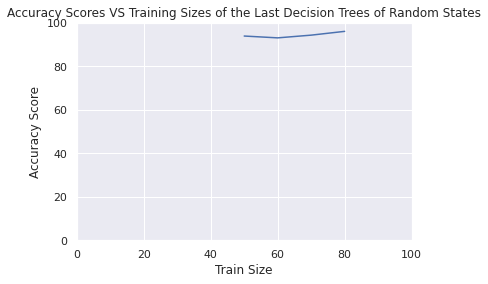

In [26]:
# t axis values
yplot = []
for i in range(len(ScoreResult)):
  yplot.append(round(np.mean(ScoreResult[i]),2))

print(yplot)
# corresponding x axis values
xplot = [50,60,70,80]
  
# plotting the points 
plt.plot(xplot, yplot)
  
# naming the t axis
plt.ylabel('Accuracy Score')
# naming the x axis
plt.xlabel('Train Size')
  
# giving a title to my graph
plt.title('Accuracy Scores VS Training Sizes of the Last Decision Trees of Random States')
  
plt.xlim(0, 100)
plt.ylim(0, 100)

# function to show the plot
plt.show()

[31, 39, 50, 53]


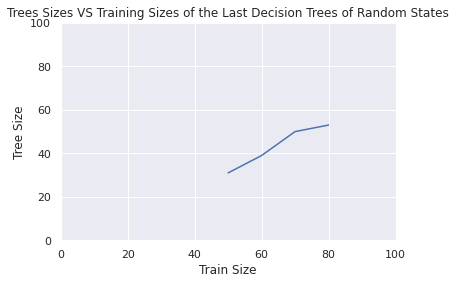

In [27]:
# t axis values
yplot = []
for i in range(len(SizeResult)):
  yplot.append(int(np.mean(SizeResult[i])))

print(yplot)
# corresponding x axis values
xplot = [50,60,70,80]
  
# plotting the points 
plt.plot(xplot, yplot)
  
# naming the t axis
plt.ylabel('Tree Size')
# naming the x axis
plt.xlabel('Train Size')
  
# giving a title to my graph
plt.title('Trees Sizes VS Training Sizes of the Last Decision Trees of Random States')
  
plt.xlim(0, 100)
plt.ylim(0, 100)

# function to show the plot
plt.show()